## Set up Google Colab environment
! git clone "https://github.com/longyuxi/naive-sentiment-analyzer"
! mv naive-sentiment-analyzer/* ./
! rm -rf sample_data/
! rm -rf naive-sentiment-analyzer/

#### Run the following block of code every time you want to switch the files you are concerned with

In [1]:
INPUT_TEXT = 'data/conversion/epistula-51-conversion.txt'
OUTPUT_CSV = 'data/conversion/epistula-51-conversion.csv'

#### Generates a csv file containing the sentiment information extracted from the text. This block does not need to be run if the csv file is already present (i.e. the information has been generated before).

In [2]:
import demensuris_analyze
demensuris_analyze.enhanced_analyze_text(INPUT_TEXT, OUTPUT_CSV)

Print out the nth sentence in the text

In [3]:
SENTENCE_NUMBER = 3

import demensuris_analyze
demensuris_analyze.print_sentence_by_number(INPUT_TEXT, SENTENCE_NUMBER)

If indeed the sacred Scripture says: “Their portions cleri, which in Greek (κλήροι, klēroi) as well as Latin also means “clergy”shall not profit them” (Jer 12:13 LXX), what clerical presumption could be of use to us, who sin not only in our thoughts and feelings but also in our speech?


In [10]:
WORD_OR_PATTERN = "making excuses "

import demensuris_analyze
demensuris_analyze.find_pattern(INPUT_TEXT, WORD_OR_PATTERN)

sentence 36: But the prophet in caution entreats the Lord: “Do not incline my heart into words of evil, making excuses for my sins” (Ps 140:4).


## WordNet enhanced AFINN

#### Just for your curiosity, if you want to see what the WordNet enhanced AFINN score of a certain word is
Uncomment these code by deleting the hashtags before them

In [5]:
import demensuris_analyze
demensuris_analyze.enhanced_afinn('sin')

-2.2

In [6]:
import demensuris_analyze
demensuris_analyze.print_synonyms_and_antonyms('sin')

Synonyms: ['sin', 'sinfulness', 'wickedness', 'sin', 'sinning', 'sine', 'sin', 'Sin', 'sin', 'sin', 'hell', 'sin', 'transgress', 'trespass', 'drop_the_ball', 'sin', 'blunder', 'boob', 'goof']

Antonyms: []



## Plots the sentiment score as a function of sentence count based on the data in OUTPUT_CSV

Note: The black dotted line is zero

#### Plot against sentence count

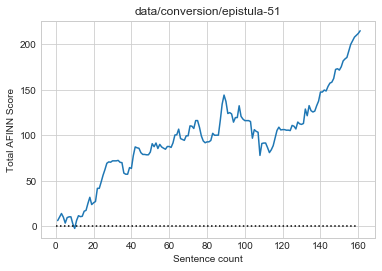

In [7]:
# Plot against sentence count
import matplotlib.pyplot as plt
import csv
import numpy as np
plt.style.use('seaborn-whitegrid')

with open(OUTPUT_CSV) as csvfile:
    csvreader = csv.reader(csvfile)
    csvdatahorizontal = list(csvreader)
    csvdatahorizontal = csvdatahorizontal[1:]
    numpy_array = np.array(csvdatahorizontal)
    csvdatavertical = numpy_array.T
    csvdatavertical = csvdatavertical.astype(float)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(csvdatavertical[0],csvdatavertical[3])
    ax.plot(np.zeros(len(csvdatavertical[4])), 'k:')
    ax.set_title(OUTPUT_CSV[:-4])
    ax.set_xlabel("Sentence count")
    ax.set_ylabel("Total AFINN Score")

#### Plot against word count

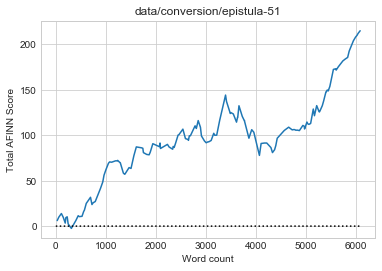

In [8]:
# Plot against word count
import matplotlib.pyplot as plt
import csv
import numpy as np
plt.style.use('seaborn-whitegrid')

with open(OUTPUT_CSV) as csvfile:
    csvreader = csv.reader(csvfile)
    csvdatahorizontal = list(csvreader)
    csvdatahorizontal = csvdatahorizontal[1:]
    numpy_array = np.array(csvdatahorizontal)
    csvdatavertical = numpy_array.T
    csvdatavertical = csvdatavertical.astype(float)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(csvdatavertical[4],csvdatavertical[3])
    ax.plot(np.zeros(int(csvdatavertical[4][-1])), 'k:')
    ax.set_title(OUTPUT_CSV[:-4]) 
    ax.set_xlabel("Word count")
    ax.set_ylabel("Total AFINN Score")
